# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
df=pd.read_csv("Data/spam_or_not_spam.csv")
df.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [43]:
df.groupby('label').count()

,email
label,
0,2500
1,499


In [44]:
df['label'].value_counts() / df.shape[0] * 100

label
0    83.333333
1    16.666667
Name: count, dtype: float64

<Axes: xlabel='label', ylabel='Count'>

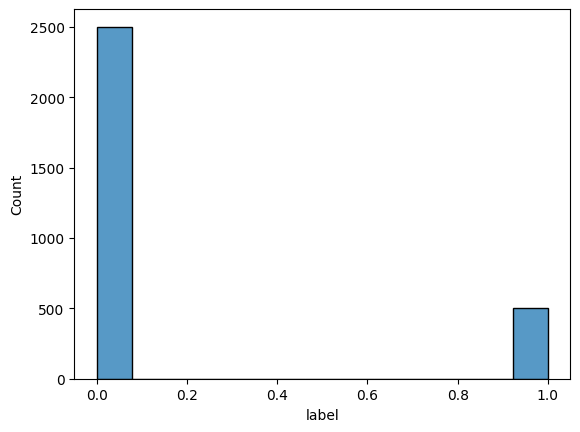

In [45]:
sns.histplot(df['label'])

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [59]:
df['email']=df['email'].str.lower()
df['email'] = df['email'].str.replace('\n', '')
df['email'] = df['email'].str.replace('\t', ' ')
df['email'] = df['email'].str.replace(' {2,}', ' ', regex=True)
df['email'] = df['email'].str.strip()

df=df.dropna()

Переводим данные в векторный вид:

In [61]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [63]:
X.shape[1]

34116

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [68]:
from sklearn.model_selection import train_test_split
y=df['label']

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [70]:
sum(y_test)/len(y_test)

0.16666666666666666

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [75]:
from sklearn.metrics import accuracy_score, precision_score,f1_score,roc_curve,roc_auc_score
from sklearn.naive_bayes import MultinomialNB,ComplementNB
alpha=0.01
MNB=MultinomialNB(alpha=alpha)
CNB=ComplementNB(alpha=alpha)
MNB.fit(X_train, y_train)
CNB.fit(X_train, y_train)
y_test_pred_MNB = MNB.predict(X_test)
y_test_pred_CNB = CNB.predict(X_test)


Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [76]:
print(f"Accuracy MultinomialNB: {accuracy_score(y_test, y_test_pred_MNB)}")
print(f"Precision MultinomialNB: {precision_score(y_test, y_test_pred_MNB)}")
print(f"F1 MultinomialNB: {f1_score(y_test, y_test_pred_MNB)}")
print(f"Accuracy ComplementNB: {accuracy_score(y_test, y_test_pred_CNB)}")
print(f"Precision ComplementNB: {precision_score(y_test, y_test_pred_CNB)}")
print(f"F1 ComplementNB: {f1_score(y_test, y_test_pred_CNB)}")

Accuracy MultinomialNB: 0.988
Precision MultinomialNB: 0.9915254237288136
F1 MultinomialNB: 0.962962962962963
Accuracy ComplementNB: 0.9893333333333333
Precision ComplementNB: 0.9915966386554622
F1 ComplementNB: 0.9672131147540983


***ComplementNB чуть лучше, чем MultinomialNB***

Нарисуйте ROC-кривую:

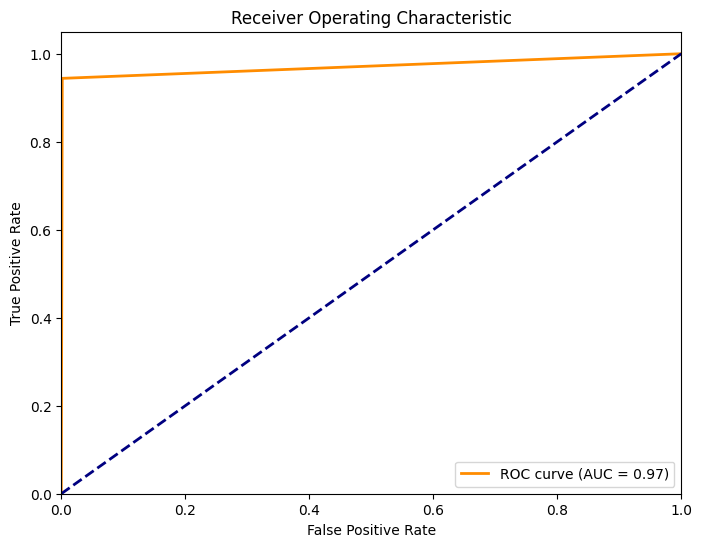

In [77]:
import matplotlib.pyplot as plt
# Вычислите значения ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_CNB)

# Вычислите AUC (площадь под ROC-кривой)
roc_auc = roc_auc_score(y_test, y_test_pred_CNB)

# Постройте ROC-кривую
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [80]:
alpha=[0.01,0.05,0.10,0.2,0.25,0.5,0.7,1]
accuracy=0.988
final=[0,0]
for i in range(len(alpha)):
    CNB=ComplementNB(alpha=alpha[i])
    CNB.fit(X_train,y_train)
    y_test_pred_CNB=CNB.predict(X_test)
    if accuracy_score(y_test, y_test_pred_CNB)>accuracy:
        final[0]=accuracy_score(y_test, y_test_pred_CNB)
        final[1]=alpha[i]
        accuracy=accuracy_score(y_test, y_test_pred_CNB)
print(f"The Best Accuracy ComplementNB: {final[0]}, alpha={final[1]}")


The Best Accuracy ComplementNB: 0.9946666666666667, alpha=0.05
